###### Content provided under a Creative Commons Attribution license, CC-BY 4.0; code under BSD 3-Clause license. (c)2014 Lorena A. Barba, Pi-Yueh Chuang. Thanks: NSF for support via CAREER award #1149784.

# Source Distribution on an Airfoil

In [Lesson 3](03_Lesson03_doublet.ipynb) of *AeroPython*, you learned that it is possible to represent potential flow around a circular cylinder using the superposition of a doublet singularity and a free stream. But potential flow is even more powerful: you can represent the flow around *any* shape. How is it possible, you might ask?

For non-lifting bodies, you can use a source distribution on the body surface, superposed with a free stream. In this assignment, you will build the flow around a NACA0012 airfoil, using a set of sources.

Before you start, take a moment to think: in flow around a symmetric airfoil at $0^{\circ}$ angle of attack,

* Where is the point of maximum pressure?
* What do we call that point?
* Will the airfoil generate any lift?

At the end of this assignment, come back to these questions, and see if it all makes sense.

## Problem Setup

You will read data files containing information about the location and the strength of a set of sources located on the surface of a NACA0012 airfoil. 

There are three data files: NACA0012_x.txt, NACA0012_y.txt, and NACA0012_sigma.txt. To load each file into a NumPy array, you need the function [`numpy.loadtxt`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). The files should be found in the `resources` folder of the `lessons`. 

Using 51 mesh points in each direction, and a domain $[-1, 2]\times[-0.5, 0.5]$, compute the velocity due to the set of sources plus a free stream in the $x$-direction with $U_{\infty}=1$. Also compute the coefficient of pressure on your grid points.

## Questions:

1. What is the value of maximum pressure coefficient, $C_p$?
2. What are the array indices for the maximum value of $C_p$?

Make the following plots to visualize and inspect the resulting flow pattern:

* Stream lines in the domain and the profile of our NACA0012 airfoil, in one plot
* Distribution of the pressure coefficient and a single marker on the location of the maximum pressure

**Hint**: You might use the following NumPy functions: [`numpy.unravel_index`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.unravel_index.html) and [`numpy.argmax`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)

##### Think

1. Do the stream lines look like you expected?
2. What does the distribution of pressure tell you about lift generated by the airfoil?
3. Does the location of the point of maximum pressure seem right to you?

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [10]:
naca_x = np.loadtxt('./resources/NACA0012_x.txt')
naca_y = np.loadtxt('./resources/NACA0012_y.txt')
sigma = np.loadtxt('./resources/NACA0012_sigma.txt')

In [11]:
N = 51
x_start, x_end = -1, -0.5
y_start, y_end = 0.5, 2
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [ ]:
u_inf = 1.0

u_freestream = u_inf * np.ones((N,N), dtype=float)
v_freestream = np.zeros((N,N),dtype=float)

psi_freestream = u_inf * Y

In [14]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * numpy.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * numpy.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [15]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * numpy.pi) * numpy.arctan2((Y - ys), (X - xs))
    
    return psi

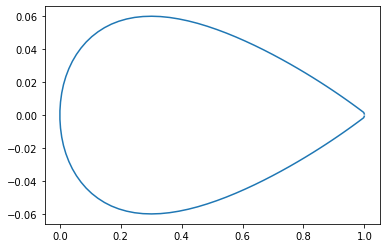

In [13]:
plt.plot(naca_x,naca_y)

In [1]:
from IPython.core.display import HTML
def css_styling(filepath):
    styles = open(filepath, 'r').read()
    return HTML(styles)
css_styling('../styles/custom.css')